<a href="https://colab.research.google.com/github/justashu/Analysis-of-Actin-Myosin-Kinetics-Influence-of-ATP-Concentration-on-Step-Size/blob/main/BTP_Analysis_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

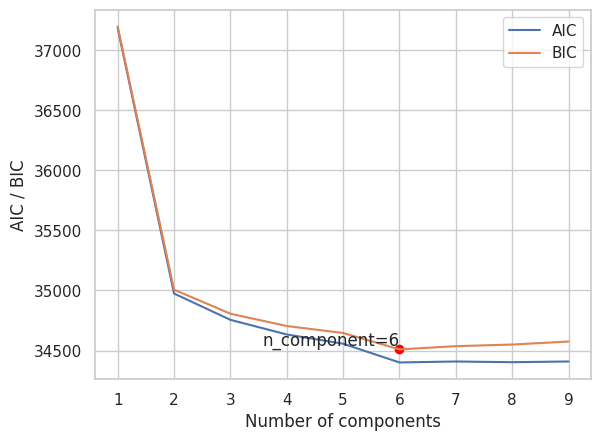

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/30degAllData_steps4.xlsx')  # Replace with your file path
data = df[0]  # Replace with your actual column name

# Test different numbers of components
n_components = np.arange(1, 10)  # Adjust the range as needed
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data.values.reshape(-1, 1)) for n in n_components]

# Calculate the AIC and BIC
aics = [m.aic(data.values.reshape(-1, 1)) for m in models]
bics = [m.bic(data.values.reshape(-1, 1)) for m in models]

# Find the model with the lowest BIC
min_bic_val = min(bics)
min_bic_idx = bics.index(min_bic_val)

# Plot the AIC and BIC
plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')

# Highlight the point with the lowest BIC
plt.scatter(n_components[min_bic_idx], min_bic_val, color='red')
plt.text(n_components[min_bic_idx], min_bic_val, 'n_component='+f'{n_components[min_bic_idx]}', verticalalignment='bottom', horizontalalignment='right')

plt.legend()
plt.xlabel('Number of components')
plt.ylabel('AIC / BIC')
plt.grid(True)  # Adding grid for better readability
plt.show()

# Use the best model for further analysis
best_gmm = models[min_bic_idx]


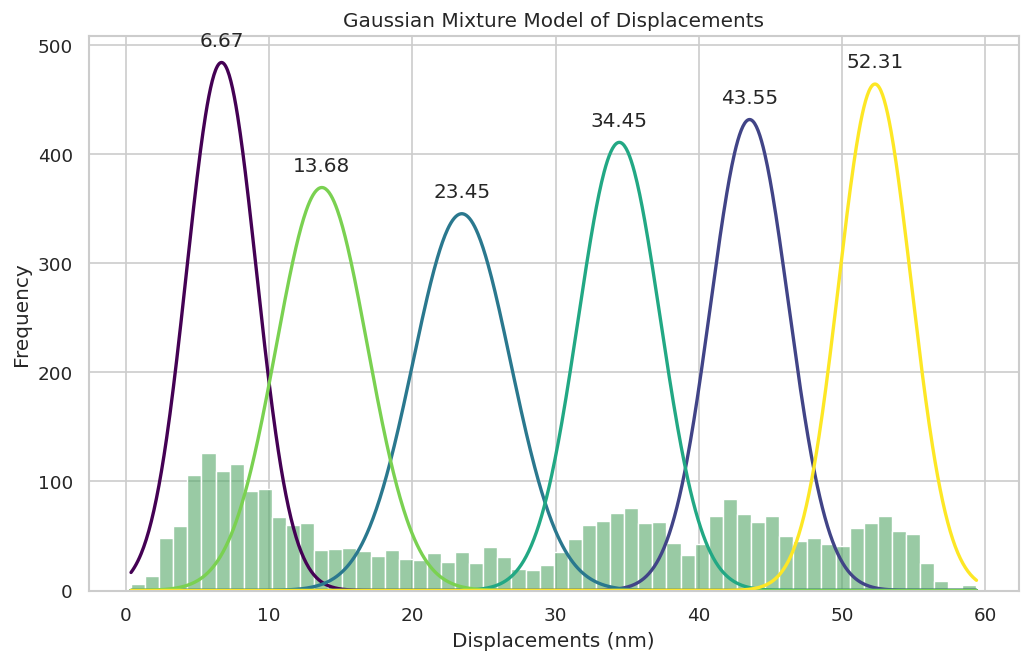

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# Load data
data = pd.read_excel('/content/15degAllData_steps4.xlsx')
column_name = 'your_column_name'  # Replace with your actual column name
data_values = data[0].values

# Fit the GMM
n_components = 6
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data_values.reshape(-1, 1))

# Obtain means and variances
means = gmm.means_.flatten()
variances = gmm.covariances_.flatten()

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6), dpi=120)

# Plot the histogram
num_bins = 60
sns.histplot(data_values, bins=num_bins, alpha=0.6, color='g', kde=False)

# Calculate bin width
data_range = max(data_values) - min(data_values)
bin_width = data_range / num_bins

# Plot each Gaussian distribution
x = np.linspace(min(data_values), max(data_values), 1000)
colors = plt.cm.viridis(np.linspace(0, 1, n_components))
for mean, variance, color in zip(means, variances, colors):
    y = norm.pdf(x, mean, np.sqrt(variance)) * len(data_values) * bin_width
    plt.plot(x, y, color=color, linewidth=2)
    peak_height = norm.pdf(mean, mean, np.sqrt(variance)) * len(data_values) * bin_width
    plt.annotate(f'{mean:.2f}', (mean, peak_height), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Displacements (nm)')
plt.ylabel('Frequency')
plt.title('Gaussian Mixture Model of Displacements')
plt.show()


<ipython-input-19-1c1db7203a1e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['labels'] = labels


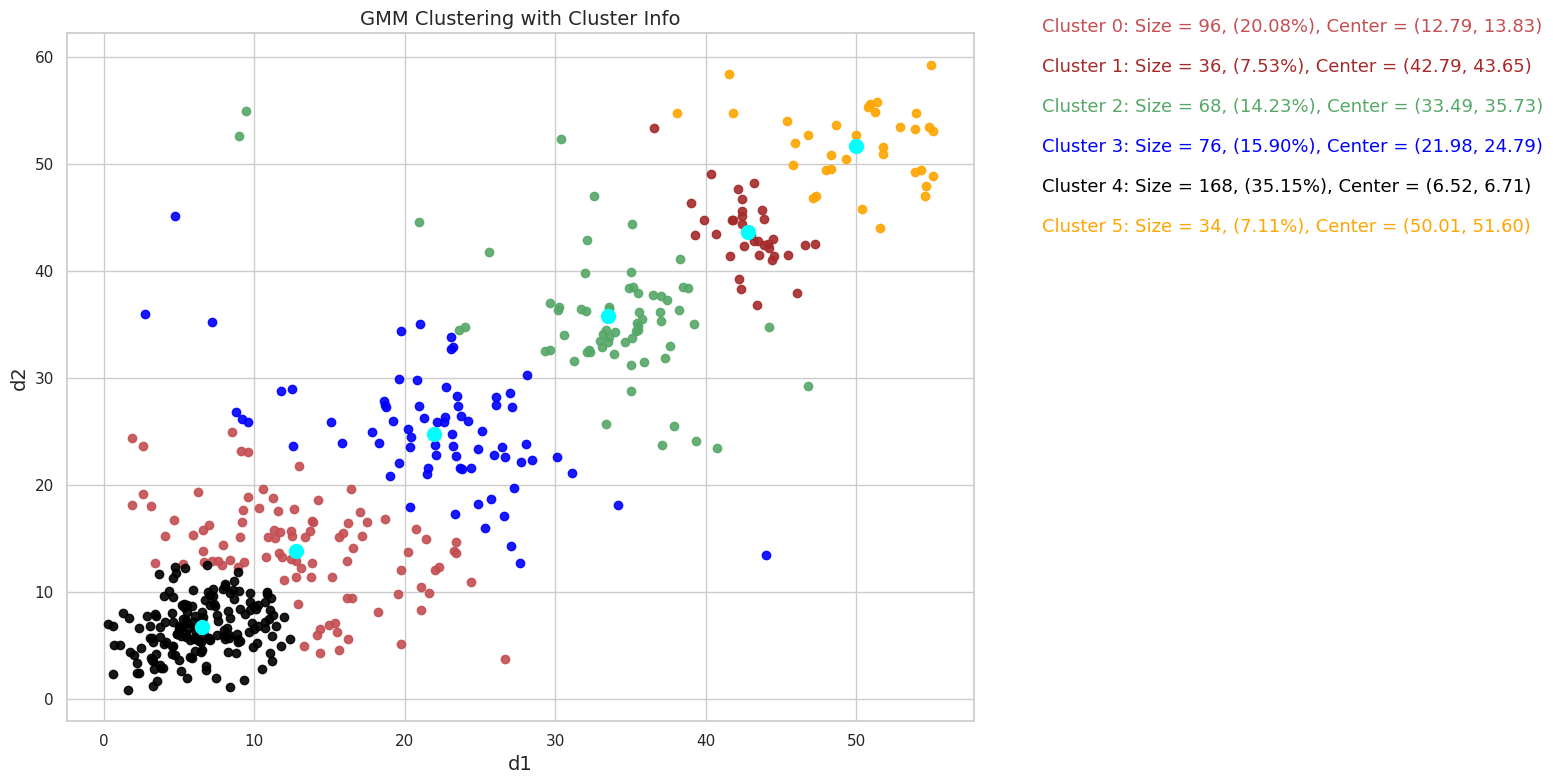

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

# Load data
df = pd.read_excel('/content/pooled_data_d1d2d3d4_30degree_minStep4.xlsx')
d = df[['d1', 'd2']]

## define no of clusters expected
clusters = 6

# Fit the GMM model
gmm = GaussianMixture(n_components=clusters)
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels'] = labels

# Create dataframes for each cluster
clusters = [d[d['labels'] == i] for i in range(clusters)]

# Define colors for each cluster
colors = ['r', 'brown', 'g', 'blue', 'black', 'orange', 'pink', 'violet', 'green']

plt.figure(figsize=(10, 8), dpi=100)  # Increase size and resolution

# Plot clusters
for cluster, color in zip(clusters, colors):
    plt.scatter(cluster['d1'], cluster['d2'], c=color, alpha=0.9)

# Plot the centers of the clusters
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=100, marker='o')

# Cluster info text
total_points = len(d)
for i, (cluster, color) in enumerate(zip(clusters, colors)):
    cluster_size = len(cluster)
    percentage = (cluster_size / total_points) * 100
    center_text = f'({gmm.means_[i, 0]:.2f}, {gmm.means_[i, 1]:.2f})'
    info_text = f'Cluster {i}: Size = {cluster_size}, ({percentage:.2f}%), Center = {center_text}'
    plt.figtext(1.05, 0.95 - i * 0.05, info_text, color=color, ha='left', fontsize=13)

plt.title('GMM Clustering with Cluster Info', fontsize=14)
plt.xlabel('d1', fontsize=14)
plt.ylabel('d2', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-77-4646b593b887>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['labels'] = labels


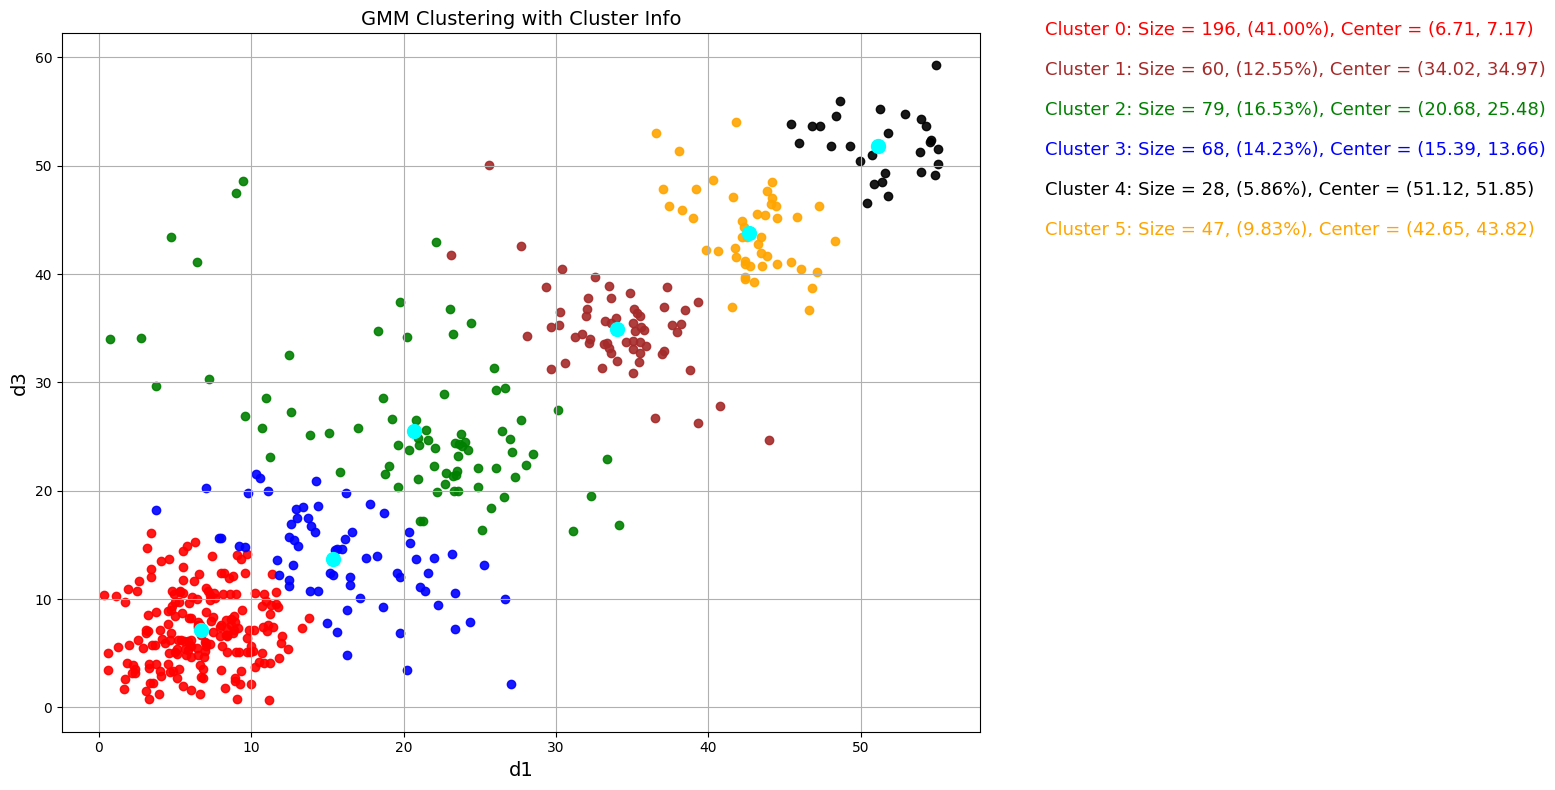

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

# Load data
df = pd.read_excel('/content/pooled_data_d1d2d3d4_30degree_minStep4.xlsx')
d = df[['d1', 'd3']]

## define no of clusters expected
clusters = 6

# Fit the GMM model
gmm = GaussianMixture(n_components=clusters)
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels'] = labels

# Create dataframes for each cluster
clusters = [d[d['labels'] == i] for i in range(clusters)]

# Define colors for each cluster
colors = colors = ['r', 'brown', 'g', 'blue', 'black', 'orange', 'pink', 'yellow', 'green']

plt.figure(figsize=(10, 8), dpi=100)  # Increase size and resolution

# Plot clusters
for cluster, color in zip(clusters, colors):
    plt.scatter(cluster['d1'], cluster['d3'], c=color, alpha=0.9)

# Plot the centers of the clusters
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=100, marker='o')

# Cluster info text
total_points = len(d)
for i, (cluster, color) in enumerate(zip(clusters, colors)):
    cluster_size = len(cluster)
    percentage = (cluster_size / total_points) * 100
    center_text = f'({gmm.means_[i, 0]:.2f}, {gmm.means_[i, 1]:.2f})'
    info_text = f'Cluster {i}: Size = {cluster_size}, ({percentage:.2f}%), Center = {center_text}'
    plt.figtext(1.05, 0.95 - i * 0.05, info_text, color=color, ha='left', fontsize=13)

plt.title('GMM Clustering with Cluster Info', fontsize=14)
plt.xlabel('d1', fontsize=14)
plt.ylabel('d3', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-80-90fae63efa13>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['labels'] = labels


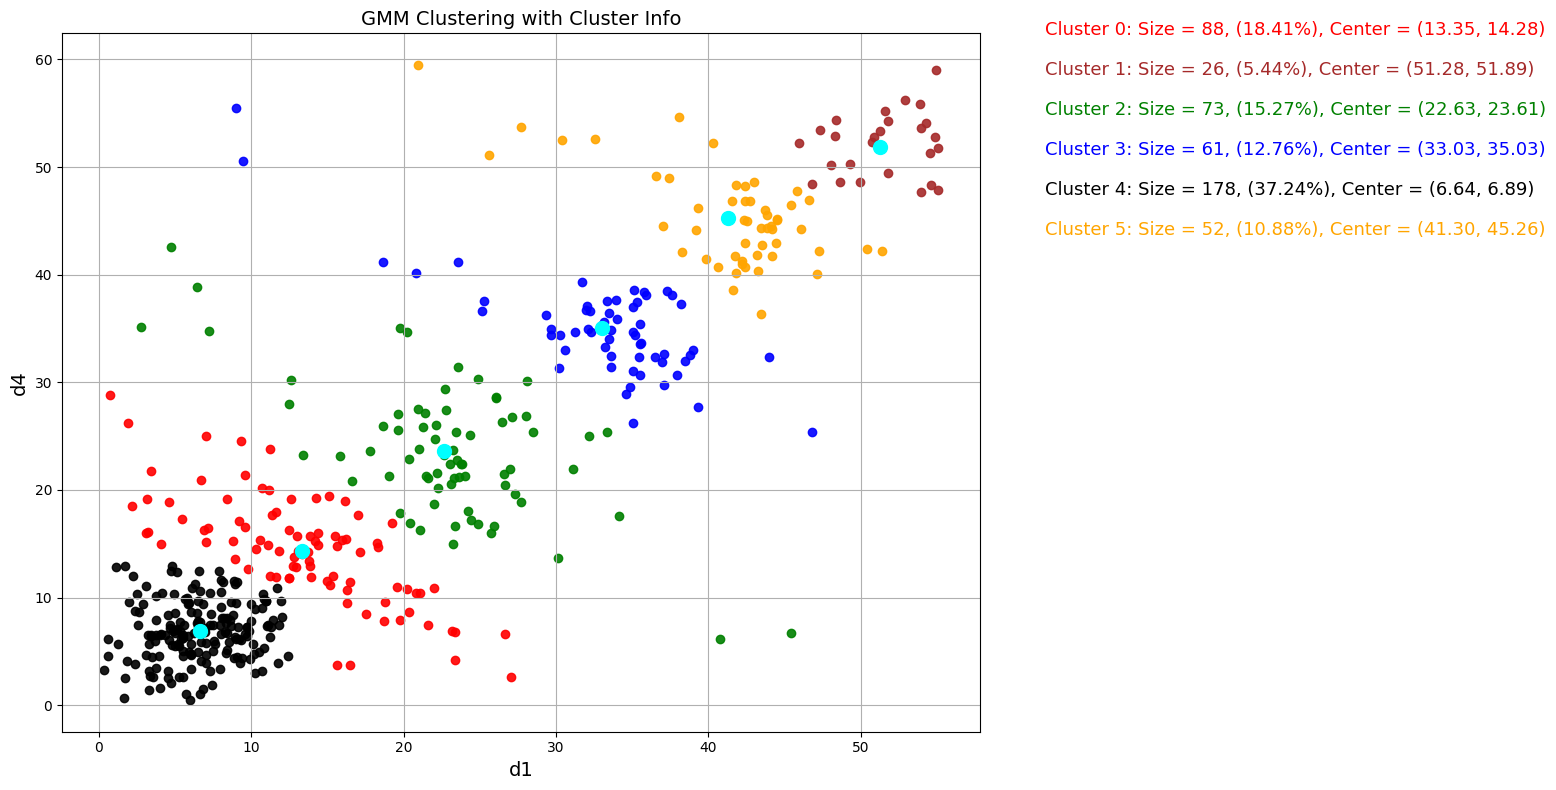

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

# Load data
df = pd.read_excel('/content/pooled_data_d1d2d3d4_30degree_minStep4.xlsx')
d = df[['d1', 'd4']]

## define no of clusters expected
clusters = 6

# Fit the GMM model
gmm = GaussianMixture(n_components=clusters)
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels'] = labels

# Create dataframes for each cluster
clusters = [d[d['labels'] == i] for i in range(clusters)]

# Define colors for each cluster
colors = colors = ['r', 'brown', 'g', 'blue', 'black', 'orange', 'pink', 'yellow', 'green']

plt.figure(figsize=(10, 8), dpi=100)  # Increase size and resolution

# Plot clusters
for cluster, color in zip(clusters, colors):
    plt.scatter(cluster['d1'], cluster['d4'], c=color, alpha=0.9)

# Plot the centers of the clusters
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='cyan', s=100, marker='o')

# Cluster info text
total_points = len(d)
for i, (cluster, color) in enumerate(zip(clusters, colors)):
    cluster_size = len(cluster)
    percentage = (cluster_size / total_points) * 100
    center_text = f'({gmm.means_[i, 0]:.2f}, {gmm.means_[i, 1]:.2f})'
    info_text = f'Cluster {i}: Size = {cluster_size}, ({percentage:.2f}%), Center = {center_text}'
    plt.figtext(1.05, 0.95 - i * 0.05, info_text, color=color, ha='left', fontsize=13)

plt.title('GMM Clustering with Cluster Info', fontsize=14)
plt.xlabel('d1', fontsize=14)
plt.ylabel('d4', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
